<a href="https://colab.research.google.com/github/EHOVITAUM/Machine_Learnig_Models-/blob/main/C%C3%B3pia_de_provaP1_vitor_jose_ferreira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


P1 de Aprendizado de Máquina - 2º sem. 2023
Variável ALVO é Class.

1) Como foi a preparação (pré-processamento da base)?
apenas retirei a coluna 'Unnamed', que copiava o indice das linhas da tabela.

1a) Dados faltantes?
NÃO

1b) Variáveis categóricas?
Não

2) Qual modelo você escolheu? Reg. Logística ou Reg. Linear? Por quê?
regressão logistica, pois busco encontrar um valor logico, sim ou não, 0 ou 1, aprovado ou reprovado, e foi preciso utilizar muitos parametros , coisa que seria inviável em uma regressão linear simples

3) Avaliação. Como fez a avaliação? Quais métricas? O modelo foi satisfatório?

realizei a avaliação pela acuracia de matriz de confusão , de primeira nao se mostrou tão satisfatório, então optei por alterar a fatia de treino e teste, que resultou em uma diferença pequena, então utilizei a sobre amostragem e a acurácia impressa pela matriz de confusão mostrou estar 98% precisa.

4) Você decidiu balancear a base? Por quê? Se sim, houve alteração significatica?

resposta acima



In [ ]:
import pandas as pd
!wget https://raw.githubusercontent.com/cedmenezes/estudos/main/creditcard2.csv # importando dataframe
df = pd.read_csv('creditcard2.csv')

--2023-10-04 19:34:29--  https://raw.githubusercontent.com/cedmenezes/estudos/main/creditcard2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16000723 (15M) [text/plain]
Saving to: ‘creditcard2.csv.1’

creditcard2.csv.1   100%[===================>]  15.26M  --.-KB/s    in 0.1s    

2023-10-04 19:34:30 (116 MB/s) - ‘creditcard2.csv.1’ saved [16000723/16000723]



In [ ]:
df.head(3000) # exibindo primeiros dados do df

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,2549.0,1.215314,0.523792,-0.144504,1.409172,-0.320571,-1.434964,0.160138,-0.144819,...,-0.054926,-0.192335,-0.053462,0.545008,0.576136,-0.340671,0.018457,0.050005,1.00,0
2996,2996,2549.0,-0.971650,1.011602,1.911303,-0.272867,0.081522,-0.922228,0.715814,-0.135522,...,-0.176070,-0.745818,-0.151661,0.366912,0.126129,0.049316,-0.297565,0.104088,0.00,0
2997,2997,2550.0,-1.055610,0.012962,2.178270,1.351661,1.462775,-0.167862,1.044716,-0.969907,...,-0.219997,0.342678,-0.439939,0.131999,0.027163,-0.341652,-0.949933,-0.500359,13.31,0
2998,2998,2550.0,-1.055610,0.012962,2.178270,1.351661,1.462775,-0.167862,1.044716,-0.969907,...,-0.219997,0.342678,-0.439939,0.131999,0.027163,-0.341652,-0.949933,-0.500359,13.31,0


In [ ]:
df.count() # contando registros do df

Unnamed: 0    30000
Time          30000
V1            30000
V2            30000
V3            30000
V4            30000
V5            30000
V6            30000
V7            30000
V8            30000
V9            30000
V10           30000
V11           30000
V12           30000
V13           30000
V14           30000
V15           30000
V16           30000
V17           30000
V18           30000
V19           30000
V20           30000
V21           30000
V22           30000
V23           30000
V24           30000
V25           30000
V26           30000
V27           30000
V28           30000
Amount        30000
Class         30000
dtype: int64

In [ ]:
df.columns # exibindo colunas do df

Index(['Unnamed: 0', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount', 'Class'],
      dtype='object')

In [ ]:
df.isnull().sum() # verificando dados nulos

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.drop('Unnamed: 0',axis=1, inplace=True) # exluindo coluna 'Unnamed' , que copiou o indice
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


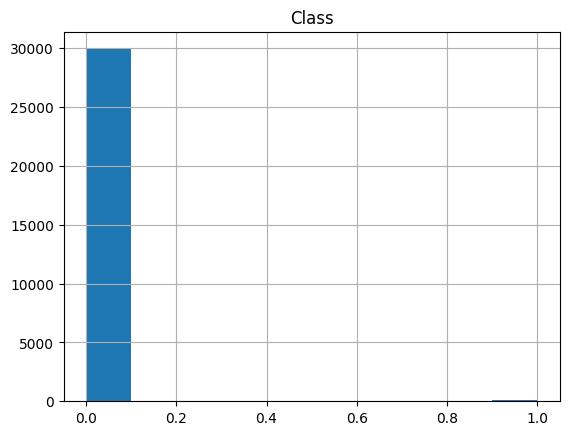

<Figure size 1800x1000 with 0 Axes>

In [ ]:
# proporção de dados target, observando balanceamento
df.hist(['Class']);
plt.figure(figsize=(18, 10))
plt.show()

In [ ]:
# evidente o desbalanceamento da variavel target

<Axes: >

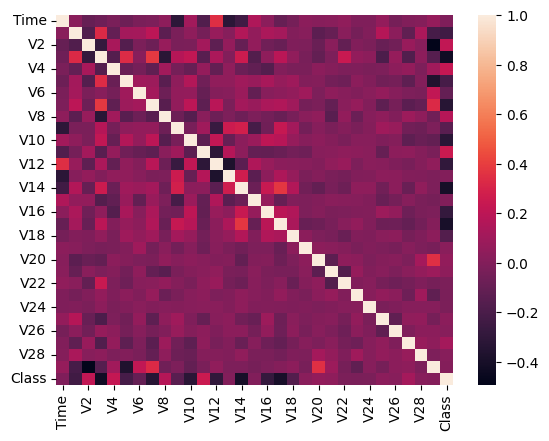

In [ ]:
import seaborn as sns
sns.heatmap(df.corr()) # imprimindo matriz de correlção com mapa de calor

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split( #aplicando fatia de treino e teste , 70/30
    df.drop('Class' , axis=1), df['Class'],
    test_size=0.30, random_state=101 )
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(xtrain, ytrain) # treino ocorre aqui

# fazendo prediçoes
prediction = logmodel.predict(xtest)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8976
           1       0.77      0.71      0.74        24

    accuracy                           1.00      9000
   macro avg       0.89      0.85      0.87      9000
weighted avg       1.00      1.00      1.00      9000

[[8971    5]
 [   7   17]]


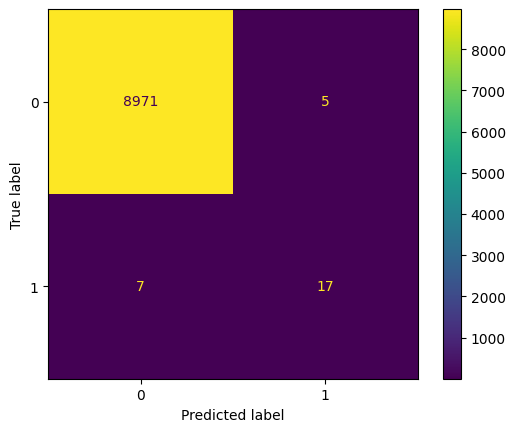

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print(classification_report(ytest,prediction))
#imprimindo matriz de confusao
conf_mat = confusion_matrix(ytest , prediction)
print(conf_mat)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.show()

alterando fatia de treino e teste, anterior era 70/30, agora sera 60/40.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11967
           1       0.72      0.70      0.71        33

    accuracy                           1.00     12000
   macro avg       0.86      0.85      0.85     12000
weighted avg       1.00      1.00      1.00     12000

[[11958     9]
 [   10    23]]


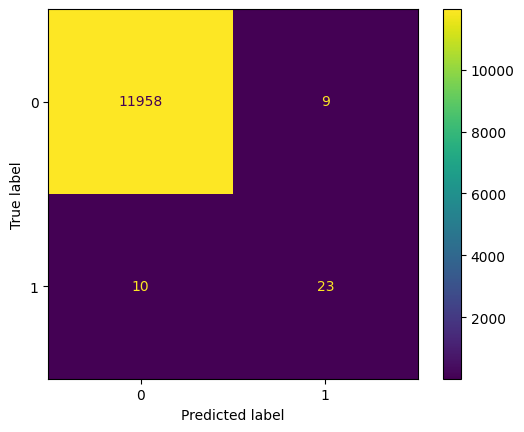

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    df.drop('Class' , axis=1), df['Class'],
    test_size=0.40, random_state=101 ) # alterando fatia de treino/teste = 60/40
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(xtrain, ytrain) # treino ocorre aqui

# fazendo prediçoes
prediction = logmodel.predict(xtest)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print(classification_report(ytest,prediction))
#imprimindo matriz de confusao
conf_mat = confusion_matrix(ytest , prediction)
print(conf_mat)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.show()

alterando a fatia de treino e teste a matriz de confusão mostra que o modelo convergiu minimamente melhor


In [ ]:
#aplicando sobre amostragem , de forma que o modelo consiga convergir melhor
from collections import Counter
print('numero de resgistros simm e não antes da sobre amostragem')
print(sorted(Counter(df['Class']).items()))

from imblearn.combine import SMOTETomek
smote = SMOTETomek(random_state=0)
x_resampled, y_resampled = smote.fit_resample(
    df.drop('Class', axis=1), df['Class'])

print( 'numero de registros sim e não apos a sobre amostragem')
print(sorted(Counter(y_resampled).items()))

numero de resgistros simm e não antes da sobre amostragem
[(0, 29906), (1, 94)]
numero de registros sim e não apos a sobre amostragem
[(0, 29815), (1, 29815)]


In [ ]:
xtrain, xtest ,ytrain, ytest = train_test_split(
    x_resampled, y_resampled,
    test_size=0.40, random_state=101)
# print(xtrain, xtest, ytrain, ytest)

# novo treino
logmodel2 = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel2.fit(xtrain, ytrain) # treino do segundo modelo

# fazendo predicoes
predictions = logmodel2.predict(xtest)

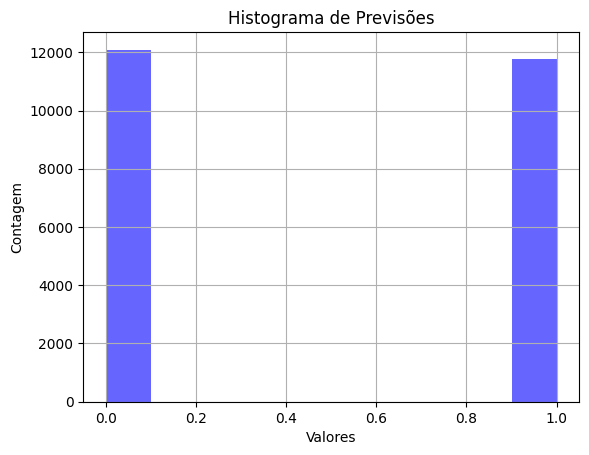

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(predictions, color='blue',alpha=0.6, label='predictions')
plt.xlabel('Valores')
plt.ylabel('Contagem')
plt.title('Histograma de Previsões')
plt.grid()
plt.show()


              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11963
           1       0.99      0.98      0.98     11889

    accuracy                           0.98     23852
   macro avg       0.98      0.98      0.98     23852
weighted avg       0.98      0.98      0.98     23852

[[11842   121]
 [  246 11643]]


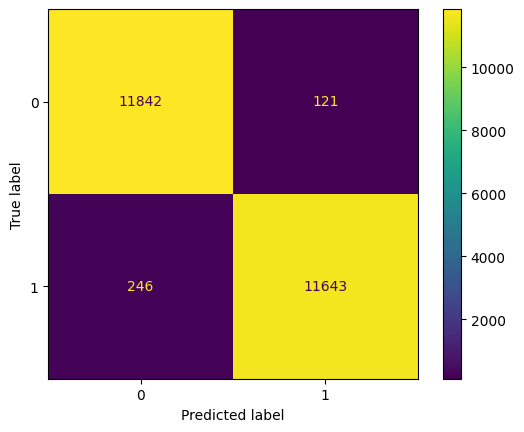

In [ ]:
print(classification_report(ytest, predictions))
# imprimindo matriz de confusao

conf_mat = confusion_matrix(ytest, predictions)
print(conf_mat)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
#plt.show()

após balanceamento da variavel target o modelo convergiu muito melhor , acuracia de 98% , sobre amostragem foi mais eficaz do que alteração da fatia de treino e teste
